In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing;
from sklearn.model_selection import train_test_split;
from sklearn import linear_model;
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

<AxesSubplot: >

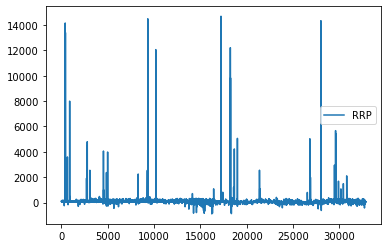

In [3]:

df = pd.read_csv('price_temp_total.csv')
prices_df = df[df['SETTLEMENTDATE']< '2021-09-30 00:00:00']
price = pd.DataFrame(prices_df.RRP)
price.plot()
# price

In [33]:
test = price[-48:]
# test

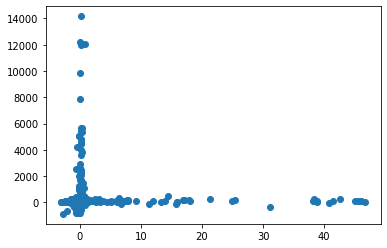

In [34]:
forecast_out = 48
test_size = 0.2; 
df = price[:-48]
label = df.shift(-forecast_out);
X = np.array(df); 
# X = preprocessing.scale(X) 

scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
# label = preprocessing.scale(label) 
#plt.plot(X)


X_lately = X[-forecast_out:] 
X = X[:-forecast_out] 
label.dropna(inplace=True)
y = np.array(label) 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) 
plt.scatter(X_train, Y_train)
plt.show()

In [35]:
# Linear regression
learner = linear_model.LinearRegression() 

learner.fit(X_train,Y_train); 
score=learner.score(X_test,Y_test)
forecast = learner.predict(X_lately) 

response = {}
response['test_score'] = score
response['forecast_set'] = forecast

# print(response);

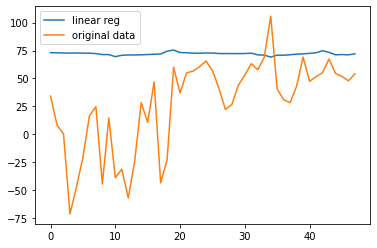

In [36]:
# forecast.shape
# X_first = scaler.inverse_transform(X_lately)
plt.plot(forecast, label='linear reg')
plt.plot(test.values, label='original data')
plt.legend()
# test

In [37]:
# Linear regression ploynomial
#################
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, Y_train)

linear2= linear_model.LinearRegression() 
linear2.fit(X_poly,Y_train)
X_lately_ = poly.fit_transform(X_lately)
forecast_ = linear2.predict(X_lately_) 



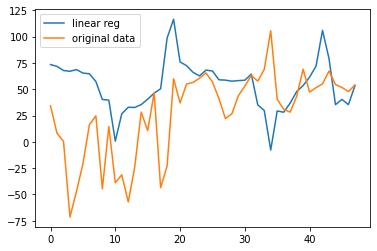

In [38]:
# forecast.shape
# X_first = scaler.inverse_transform(X_lately)
plt.plot(forecast_, label='linear reg')
plt.plot(test.values, label='original data')
plt.legend()
# test

In [39]:
X_first = scaler.inverse_transform(X_lately)
# X_La

In [40]:
Error = X_first - forecast_
Err_2 = np.power(Error, 2)
print(f'R-square {sum(Err_2)}')

R-square [136036.357108]


In [41]:
MBE = np.mean(Error)
print(f'MBE is  {MBE}')
NMBE = MBE/ np.mean(X_first)
print(f'NMBE is  {NMBE}')
Err_2 = np.power(Error, 2)
print(f'R-square {sum(Err_2)}')
NRMSE = np.sqrt(np.mean(Err_2))/np.mean(X_first)
print(f'NRMSE is  {NRMSE}')

MBE is  -37.746894596111865
NMBE is  -2.286247243676176
R-square [136036.357108]
NRMSE is  3.2243994957333793
